Heart Disease Prediction Using Logistic Regression
World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression.

In [588]:
#importing necessary files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [589]:
#reading file named "framingham.csv" into a dataframe named "dataframe"
dataframe=pd.read_csv("framingham.csv")
dataframe

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [590]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [591]:
dataframe.drop(['education'],inplace=True, axis=1)

In [592]:
dataframe.BPMeds.value_counts()

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

In [593]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
BP_median = dataframe['BPMeds'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['BPMeds'] = dataframe['BPMeds'].fillna(BP_median)


In [594]:
dataframe.cigsPerDay.value_counts()

cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [595]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
cigsPerDay_median = dataframe['cigsPerDay'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['cigsPerDay'] = dataframe['cigsPerDay'].fillna(cigsPerDay_median)


In [596]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
totChol_median = dataframe['totChol'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['totChol'] = dataframe['totChol'].fillna(totChol_median)


In [597]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
BMI_median = dataframe['BMI'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['BMI'] = dataframe['BMI'].fillna(BMI_median)


In [598]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
heartRate_median = dataframe['heartRate'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['heartRate'] = dataframe['heartRate'].fillna(heartRate_median)


In [599]:
# Assuming 'dataframe' is your DataFrame containing the 'BPMeds' column
glucose_median = dataframe['glucose'].median()

# Replace missing values in 'BPMeds' column with the median value
dataframe['glucose'] = dataframe['glucose'].fillna(glucose_median)


In [600]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


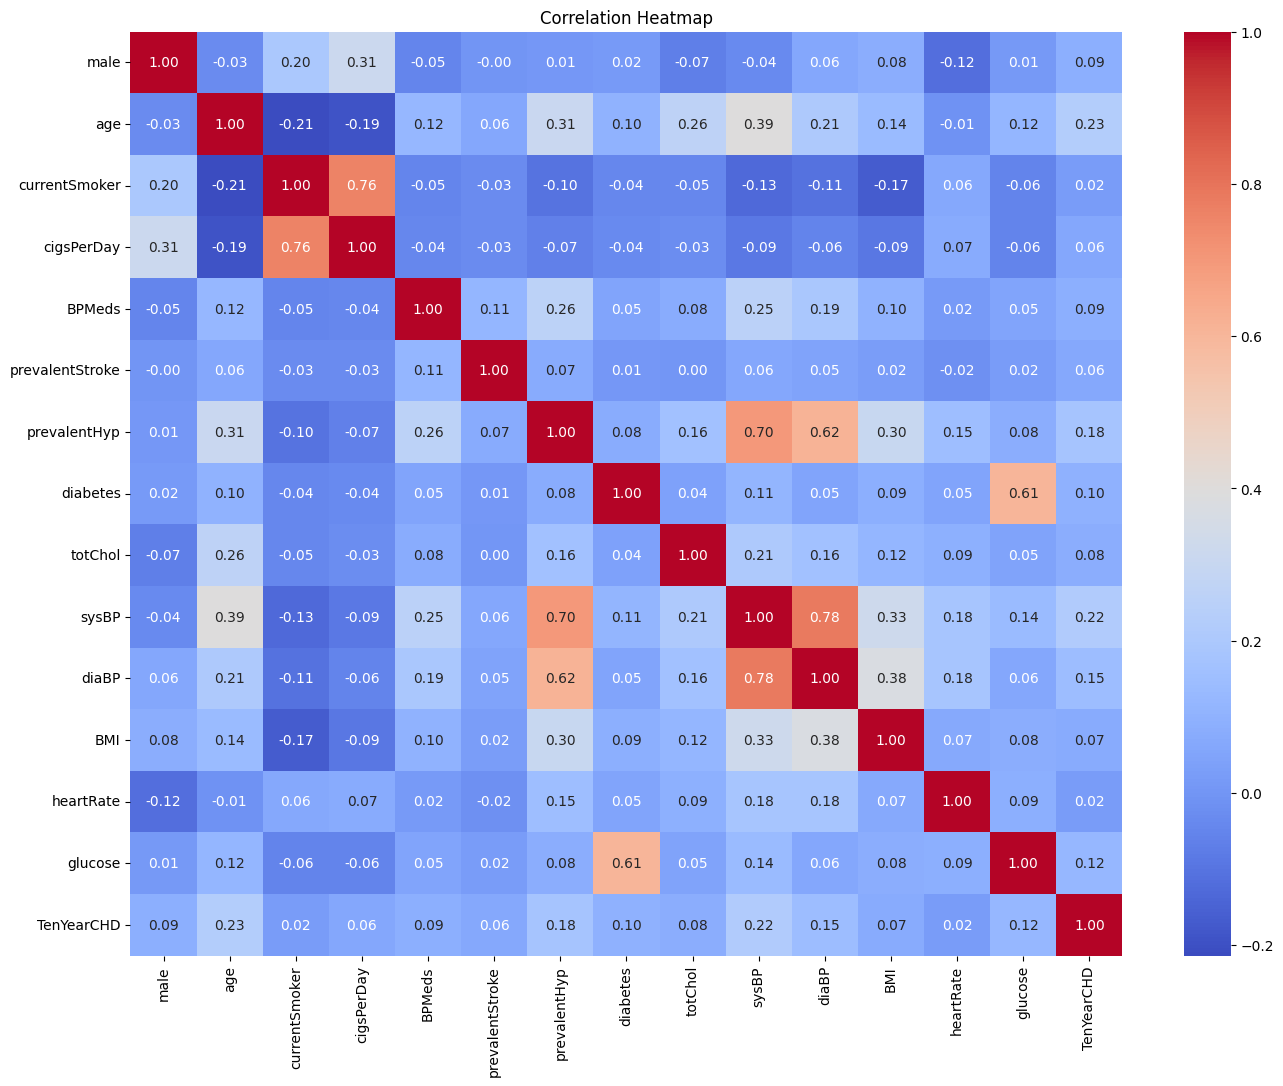

In [601]:
#plotting the heatmap to see the correlations
plt.figure(figsize=(16,12))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

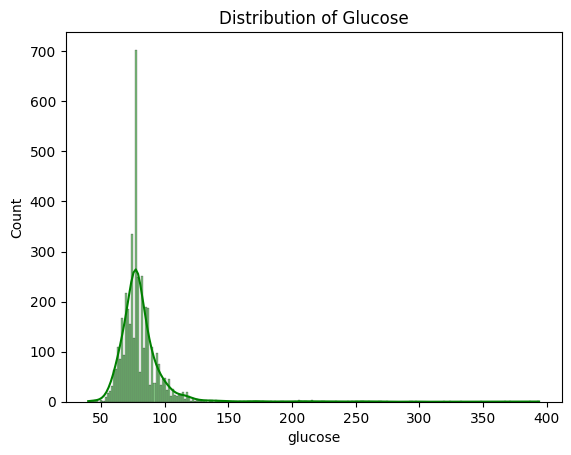

In [602]:
sns.histplot(data=dataframe, x='glucose', color='green', kde=True)
plt.title('Distribution of Glucose')
plt.show()

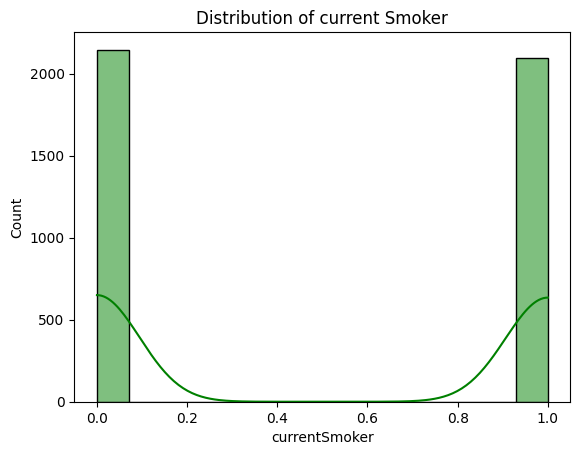

In [603]:
sns.histplot(data=dataframe, x='currentSmoker', color='green', kde=True)
plt.title('Distribution of current Smoker')
plt.show()

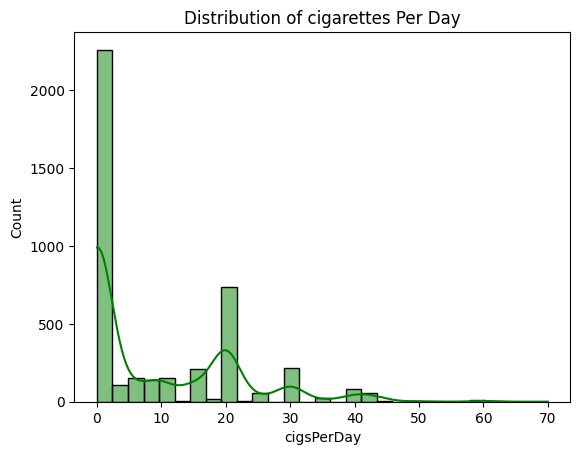

In [604]:
sns.histplot(data=dataframe, x='cigsPerDay', color='green', kde=True)
plt.title('Distribution of cigarettes Per Day')
plt.show()

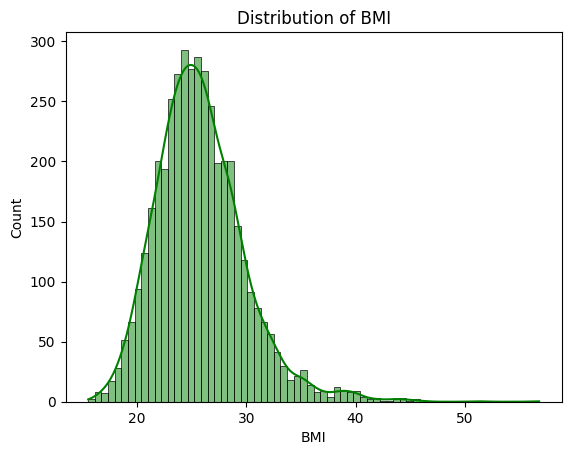

In [605]:
sns.histplot(data=dataframe, x='BMI', color='green', kde=True)
plt.title('Distribution of BMI')
plt.show()

In [606]:
dataframe.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [607]:
# dropping columns which are not needed
dataframe.drop(columns=['male', 'age','totChol','heartRate','sysBP',])

,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diaBP,BMI,glucose,TenYearCHD
0,0,0.0,0.0,0,0,0,70.0,26.97,77.0,0
1,0,0.0,0.0,0,0,0,81.0,28.73,76.0,0
2,1,20.0,0.0,0,0,0,80.0,25.34,70.0,0
3,1,30.0,0.0,0,1,0,95.0,28.58,103.0,1
4,1,23.0,0.0,0,0,0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...
4235,1,20.0,0.0,0,0,0,72.0,22.00,86.0,0
4236,1,15.0,0.0,0,0,0,87.0,19.16,78.0,0
4237,0,0.0,0.0,0,0,0,83.0,21.47,107.0,0
4238,0,0.0,0.0,0,1,0,98.0,25.60,72.0,0


In [608]:
dataframe

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [609]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the 'cigsPerDay' column
scaled_data = scaler.fit_transform(dataframe[['cigsPerDay']])

# Create a DataFrame with the scaled data
dataframe['cigsPerDay'] = pd.DataFrame(scaled_data, columns=['cigsPerDay'])

In [610]:
dataframe

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,-0.751412,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,-0.751412,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,0.928784,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1.768882,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1.180813,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,0.928784,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,0.508735,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,0,-0.751412,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,-0.751412,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [611]:
#splitting the data into features and target variable
X=dataframe.drop(columns=['TenYearCHD'])
y=dataframe['TenYearCHD']

In [612]:
#oversampling the data to remove imbalance
over_sampling_data=SMOTE()
X_res,y_res=over_sampling_data.fit_resample(X,y)

In [613]:
#splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res, test_size=0.2,random_state=42)

In [614]:
# Initializing the LogisticRegression model with max_iter=2400
model=LogisticRegression(max_iter=2500)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2500)

In [615]:
# Use the trained classifier to make predictions on the testing data (X_test)
training_data=model.predict(X_train)

# Use the trained classifier to make predictions on the training data (X_train)
testing_data=model.predict(X_test)

In [616]:
print("accuracy score on testing data is: ",accuracy_score(y_test,testing_data))
print("accuracy score on training data is: ",accuracy_score(y_train,training_data))

accuracy score on testing data is:  0.7074357192494788
accuracy score on training data is:  0.7084999130888232
